In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('netflix_titles.csv')    # wczytanie bazy danych
df.head()     # wyświetlenie 5 pierwszych wierszy bazy danych

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()           # wyświetlenie informacji ile jest wierszy i kolumn
                    # wyszczególnienie podstawowych informacji o bazie – nazwy kolumn + ilość wierszy z danymi (not-null) + typ danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.columns = df.columns.str.capitalize()     # zamiana nazw kolumn na rozpoczynające się wielką literą

In [5]:
df.head(50)

,Show_id,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
df.duplicated().sum() # sprawdzenie czy w bazie danych pojawiają się duplikaty

np.int64(0)

In [7]:
df.isnull().sum()    # sprawdzenie czy w bazie danych znajdują się puste komórki

Show_id            0
Type               0
Title              0
Director        2634
Cast             825
Country          831
Date_added        10
Release_year       0
Rating             4
Duration           3
Listed_in          0
Description        0
dtype: int64

In [8]:
# df = df.drop(columns=['Description']) # usunięcie kolumn, które nie wnoszą informacji o filmach i serialach
# df = df.drop(columns=['Listed_in'])       # ????

df = df.drop(columns=['Show_id'])  

In [12]:
df

,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [11]:
df['Date_added'] = pd.to_datetime(df['Date_added'].str.strip(), format="%B %d, %Y")  # zmiana nazw miesięcy na wartości liczbowe

In [104]:
df['Date_added'].isnull().sum()    #10
df['Duration'].isnull().sum()     # 3

np.int64(0)

In [14]:
df = df.dropna(subset=['Date_added']) # usunięcie wierszy z brakującymi wartościami w kolumnie ‘year_added’ oraz ‘duration’
df = df.dropna(subset=['Duration'])

In [15]:
df['Date_added'].isnull().sum()   # 0
df['Duration'].isnull().sum()     # 0

np.int64(0)

In [16]:
df_cleaned = df.copy()

#  dodanie nowej kolumny z rokiem dodania filmu lub serialu
df_cleaned.loc[:, 'Year_added']= df_cleaned['Date_added'].dt.year

# dodanie nowej kolumny z miesiącem dodania filmu lub serialu 
df_cleaned['Month_added'] = df_cleaned['Date_added'].dt.month

In [17]:
df_cleaned.to_csv('clean_data.csv', index=False)

# ZADANIE 2 od 7.03

In [18]:
df_movie = df_cleaned[df_cleaned['Type'] == 'Movie']
df_show = df_cleaned[df_cleaned['Type'] == 'TV Show']

In [19]:
df_movie['Type'].value_counts()
df_show['Type'].value_counts()

# lub

df_cleaned['Type'].value_counts()

Type
Movie      6128
TV Show    2666
Name: count, dtype: int64

Text(0, 0.5, 'Ilości filmów i seriali')

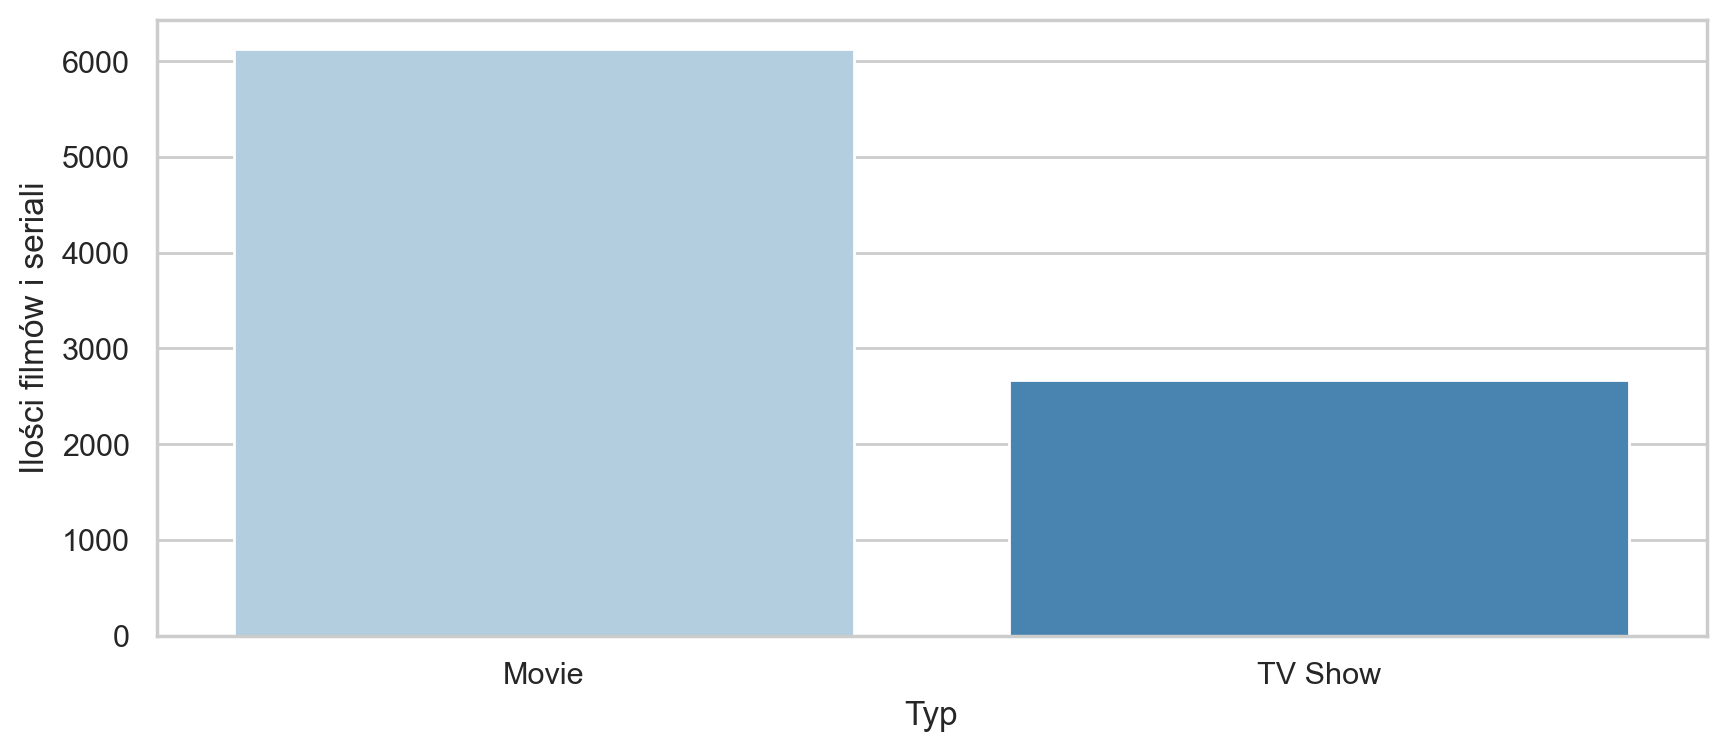

In [23]:
plt.figure(figsize=(10,4), dpi=200)
sns.set(style='whitegrid') 

sns.countplot(x='Type', data=df_cleaned, hue='Type',
             palette= 'Blues')

# plt.title("Ilości filmów i seriali", fontsize=15)
plt.xlabel("Typ", fontsize=12)
plt.ylabel("Ilości filmów i seriali", fontsize=12)

Text(0, 0.5, 'Ilość filmów i seriali')

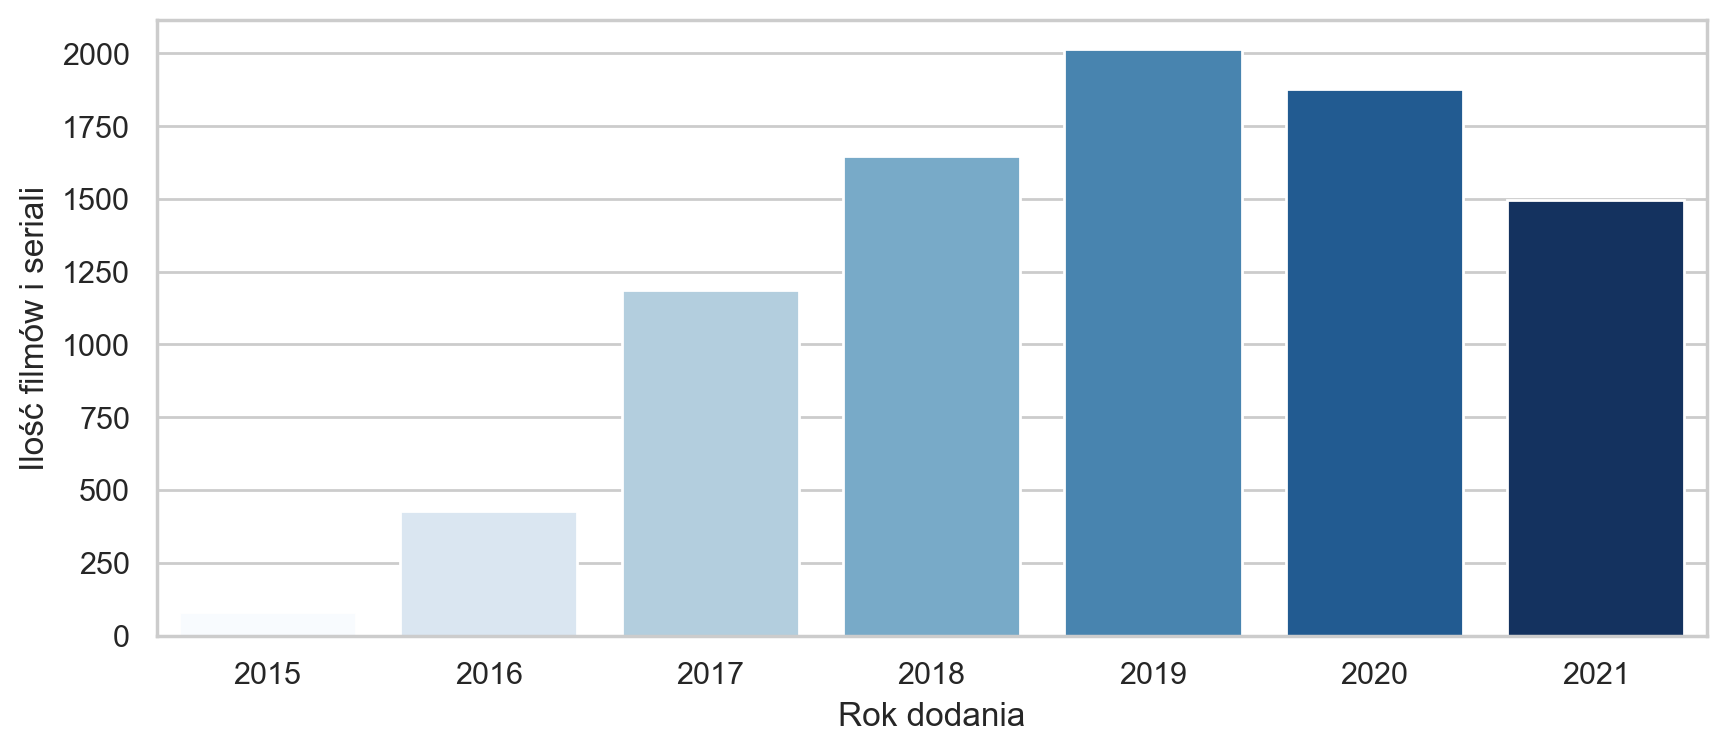

In [67]:
plt.figure(figsize=(10,4), dpi=200)
sns.set(style='whitegrid') 

sns.countplot(x='Year_added', data=df_cleaned[df_cleaned['Year_added'] >= 2015],
             hue = 'Year_added',
             palette= 'Blues',
             legend=False)

# plt.title("Liczba dodanych filmów i seriali na przestrzeni lat", fontsize=15)
plt.xlabel("Rok dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

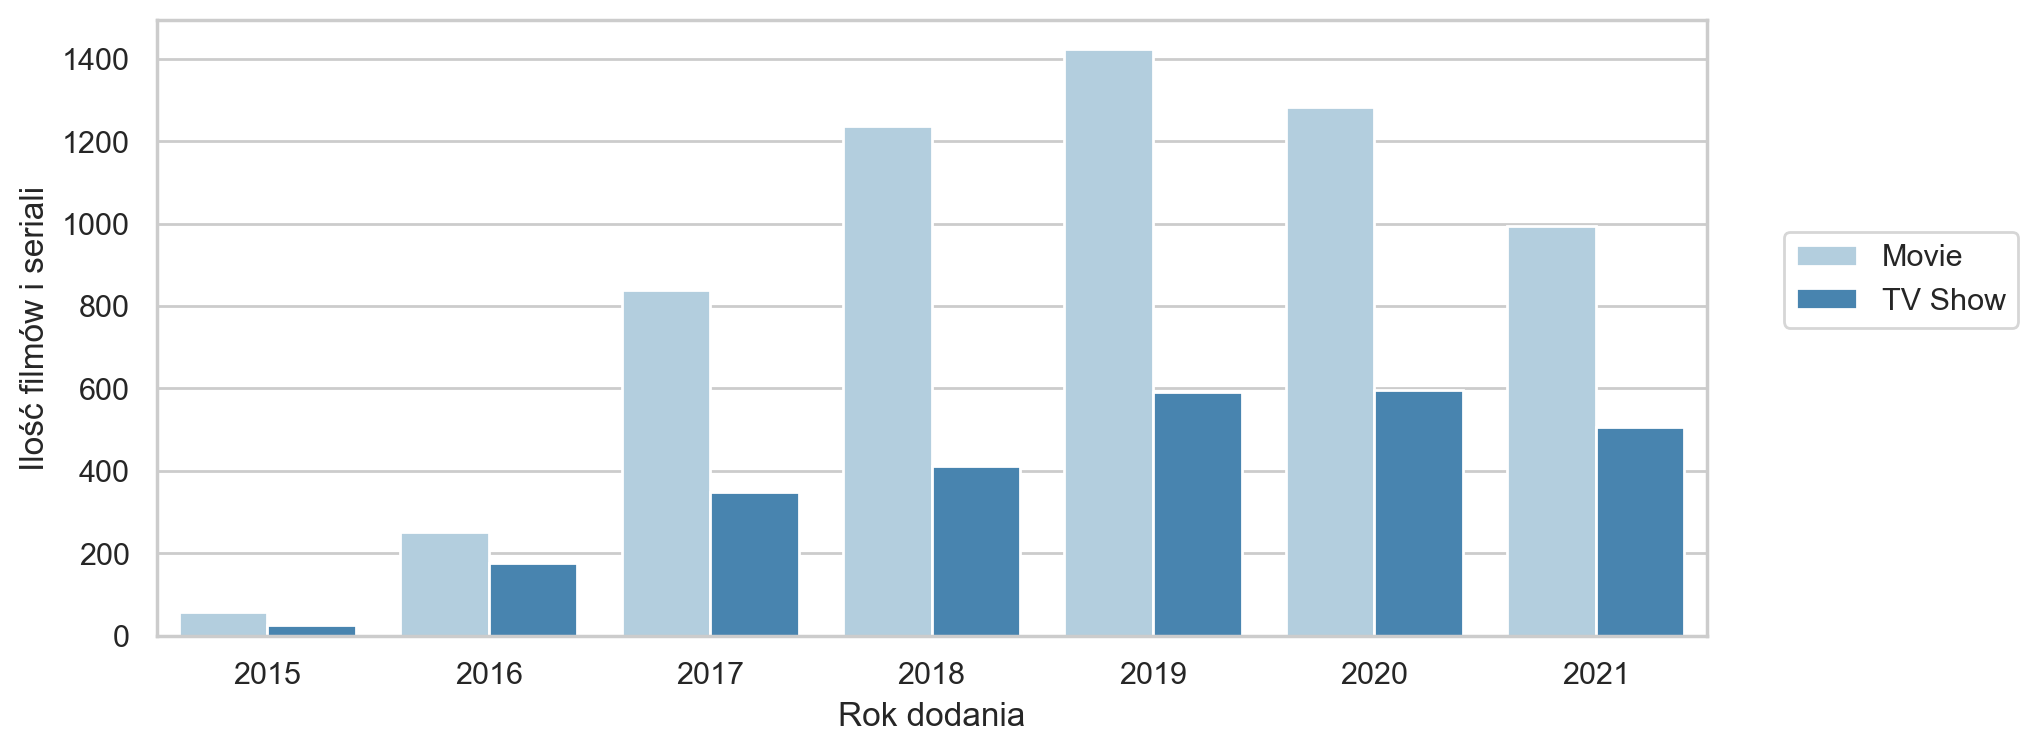

In [26]:
plt.figure(figsize=(10,4), dpi=200)
sns.set(style='whitegrid') 

sns.countplot(x='Year_added', data=df_cleaned[df_cleaned['Year_added'] >= 2015],
             hue='Type',
             palette= 'Blues')

# plt.title("Liczba dodanych filmów i seriali w poszczególnych latach", fontsize=15)
plt.xlabel("Rok dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

plt.legend(loc=(1.05, 0.5))

In [372]:
# plt.figure(figsize=(10,6), dpi=200)
# sns.countplot(x='Type', data=df_cleaned,
#              hue='Year_added')

Text(0, 0.5, 'Ilość filmów i seriali')

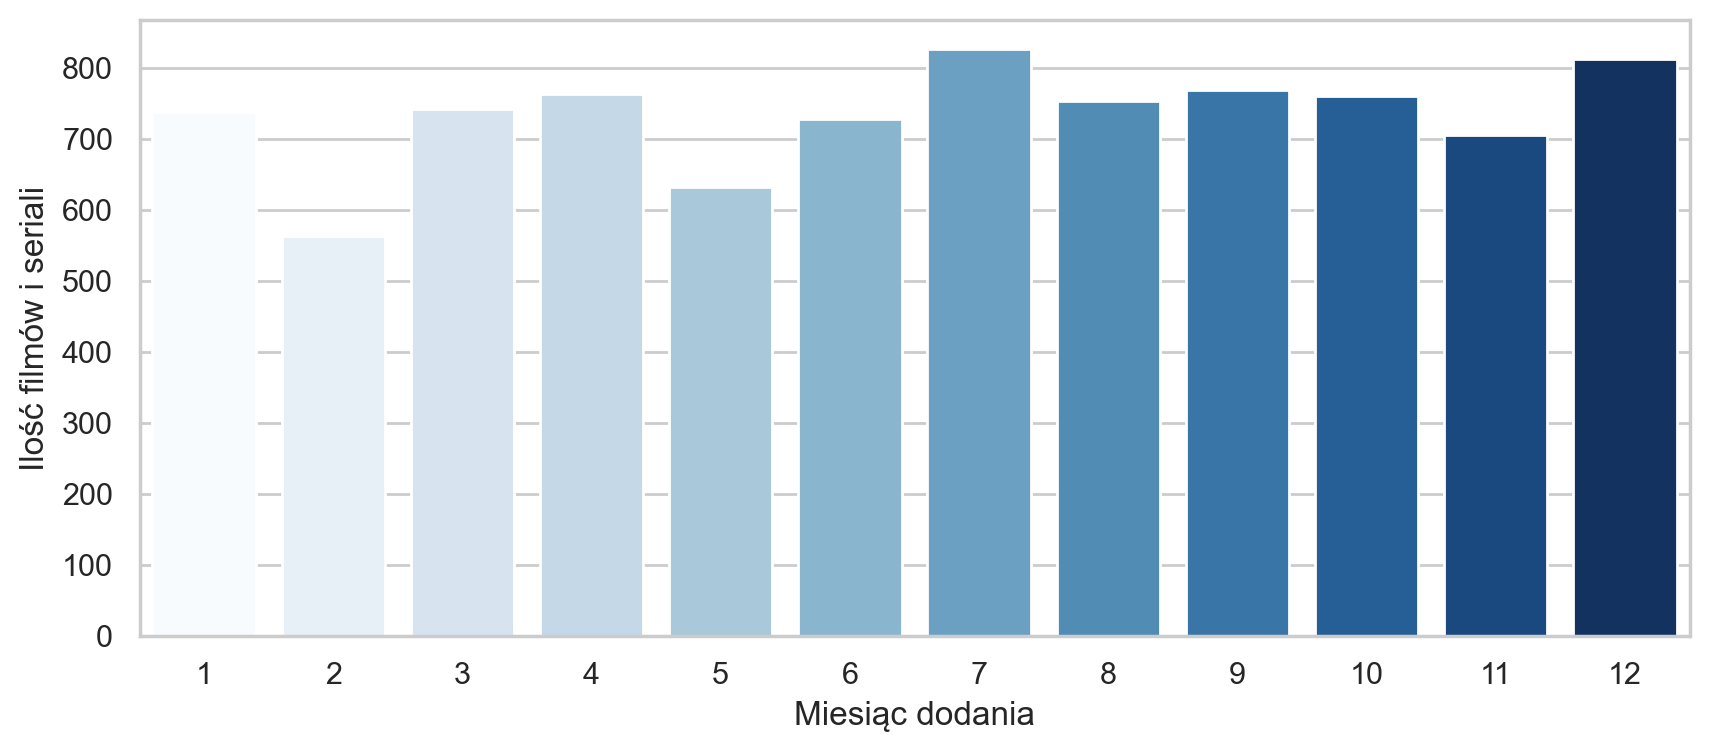

In [63]:
plt.figure(figsize=(10,4), dpi=200)
sns.set(style='whitegrid') 

sns.countplot(x='Month_added', data=df_cleaned, hue='Month_added', palette='Blues', legend=False)

# plt.title("Liczba dodanych filmów i seriali w funkcji miesięcy", fontsize=15)
plt.xlabel("Miesiąc dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

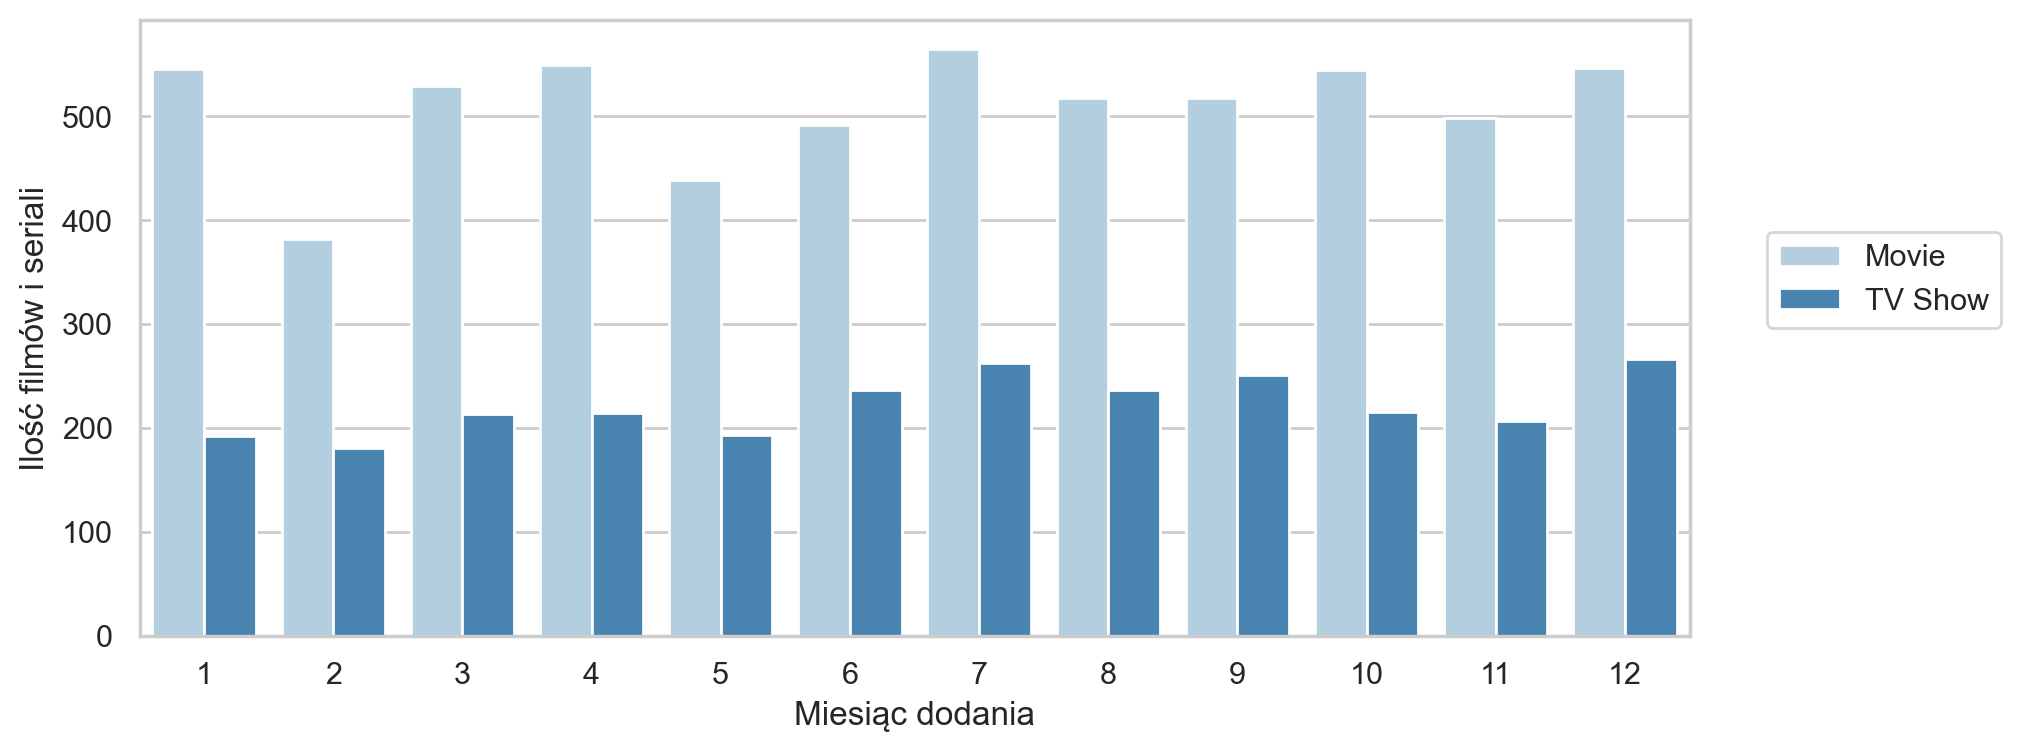

In [64]:
plt.figure(figsize=(10,4), dpi=200)
sns.set(style='whitegrid') 

sns.countplot(x='Month_added', data=df_cleaned,
             hue='Type',
             palette= 'Blues')

# plt.title("Liczba dodanych filmów i seriali w każdym miesiącu", fontsize=15)
plt.xlabel("Miesiąc dodania", fontsize=12)
plt.ylabel("Ilość filmów i seriali", fontsize=12)

plt.legend(loc=(1.05, 0.5))

# ZADANIE 3 od 11.03

In [105]:
df_show.head(50)

,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,Year_added,Month_added,Season
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,NaN,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,1
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,NaN,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,9
10,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,NaN,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",2021,9,1
11,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,2021-09-23,2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ...",2021,9,1
14,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,2021-09-22,2021,TV-MA,NaN,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...,2021,9,1
15,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,NaN,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021,9,4


In [34]:
df_show = df_show.copy()
df_show['Season'] = df_show['Duration'].str.split().str[0]

In [35]:
df_show['Duration'].value_counts()

Duration
1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: count, dtype: int64

In [36]:
df_show['Season'] = df_show['Season'].astype(int)

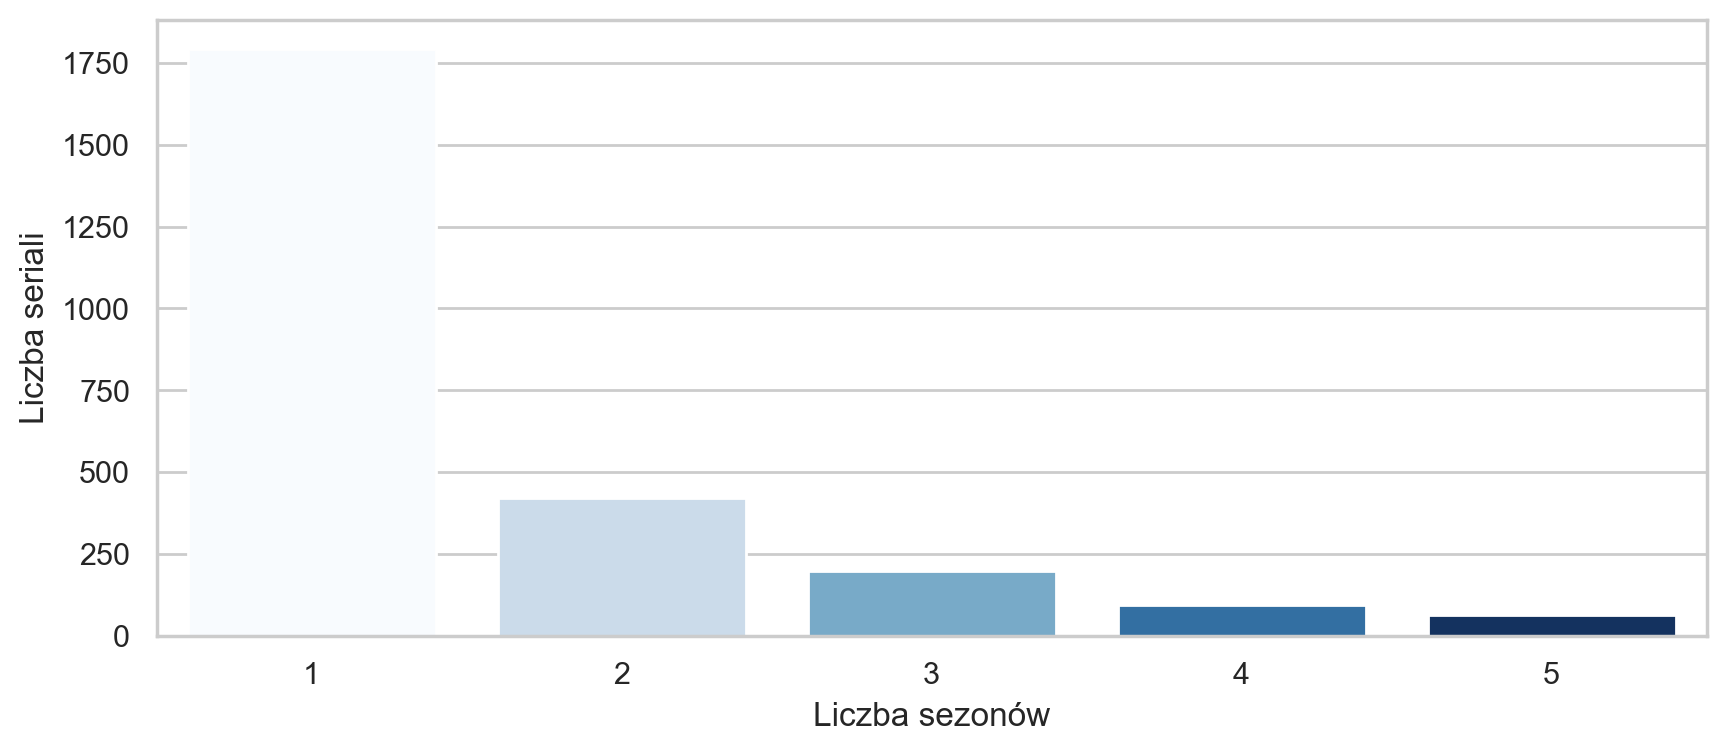

In [114]:
plt.figure(figsize=(10,4), dpi=200)
sns.set(style='whitegrid')

sns.countplot(x='Season', data=df_show[df_show['Season'] <= 5], hue='Season', palette='Blues', legend=False)

plt.xlabel("Liczba sezonów", fontsize=12)
plt.ylabel("Liczba seriali", fontsize=12)

plt.show()

In [107]:
df_show['Season'].value_counts().sort_index(ascending=False)

Season
17       1
15       2
13       2
12       2
11       1
10       6
9        9
8       17
7       23
6       33
5       64
4       94
3      198
2      421
1     1793
Name: count, dtype: int64

In [108]:
df_show.groupby('Season').filter(lambda s: s['Season'].max() >=13)

,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,Year_added,Month_added,Season
548,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,2021-07-03,2020,TV-14,NaN,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,2021,7,17
1354,TV Show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,2021-02-01,2019,TV-14,NaN,TV Dramas,Spunky teenager Amy is reeling from the sudden...,2021,2,13
2423,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",2020-06-05,2019,TV-14,NaN,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ...",2020,6,15
4220,TV Show,COMEDIANS of the world,NaN,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,2019-01-01,2019,TV-MA,NaN,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...,2019,1,13
4798,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,2018-07-01,2017,TV-14,NaN,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...,2018,7,15


In [109]:
df_movie

,Type,Title,Director,Cast,Country,Date_added,Release_year,Rating,Duration,Listed_in,Description,Year_added,Month_added,Minuts
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,90
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,91
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,125
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,104
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3,96
8802,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,158
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,88
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88


In [110]:
df_movie = df_movie.copy()
df_movie['Minuts'] = df_movie['Duration'].str.split().str[0]

df_movie['Minuts'] = df_movie['Minuts'].astype(int)

In [111]:
df_movie['Minuts'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: Minuts, dtype: float64

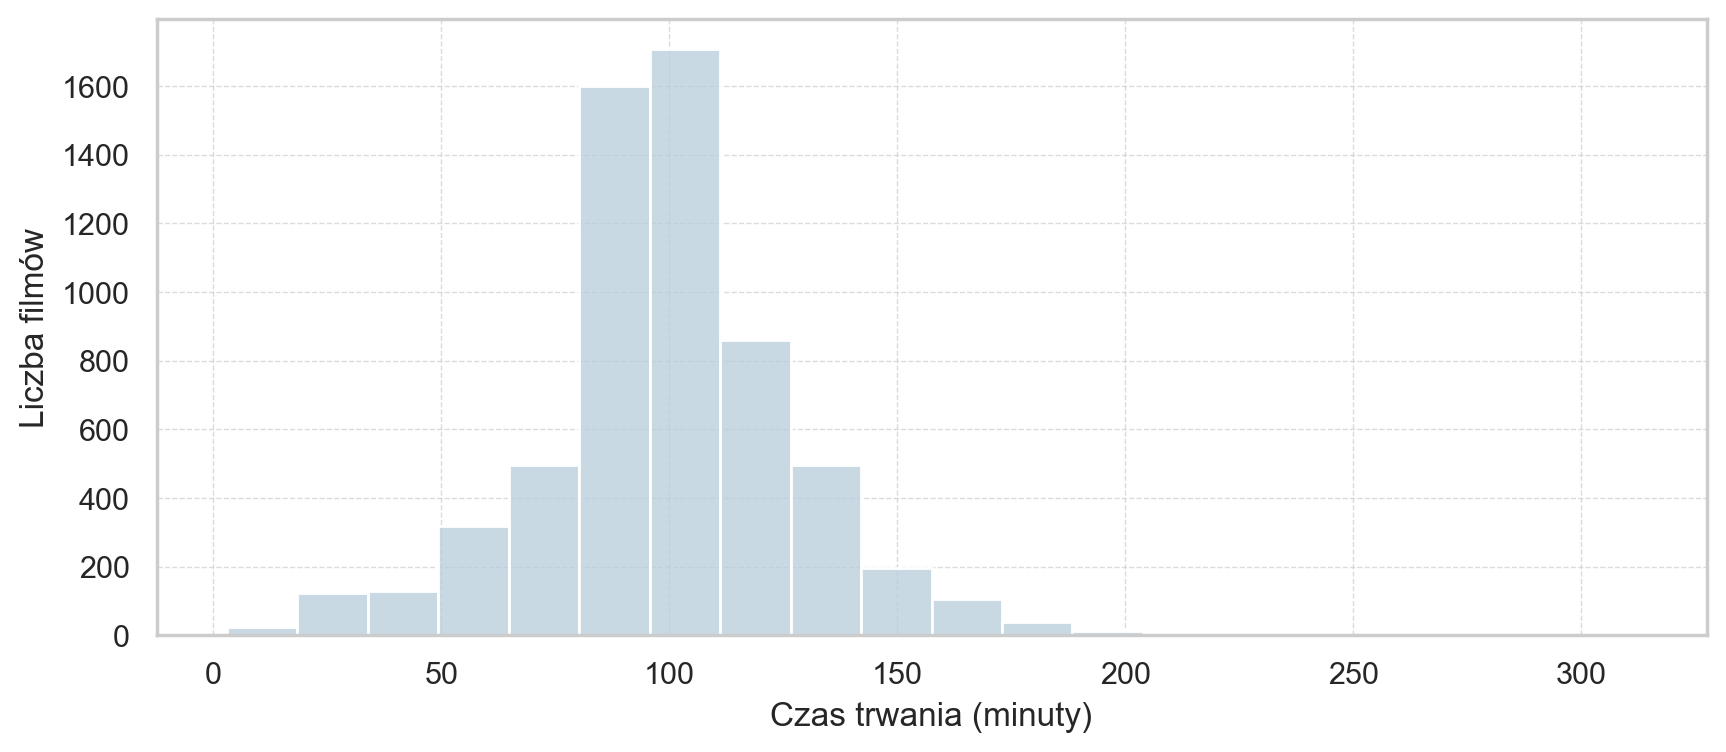

In [116]:
sns.set(style='whitegrid') 
plt.figure(figsize=(10,4), dpi=200)


sns.histplot(x='Minuts', data=df_movie, bins=20,
            color='#B8CDDC')

plt.xlabel("Czas trwania (minuty)", fontsize=12)
plt.ylabel("Liczba filmów", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# OR

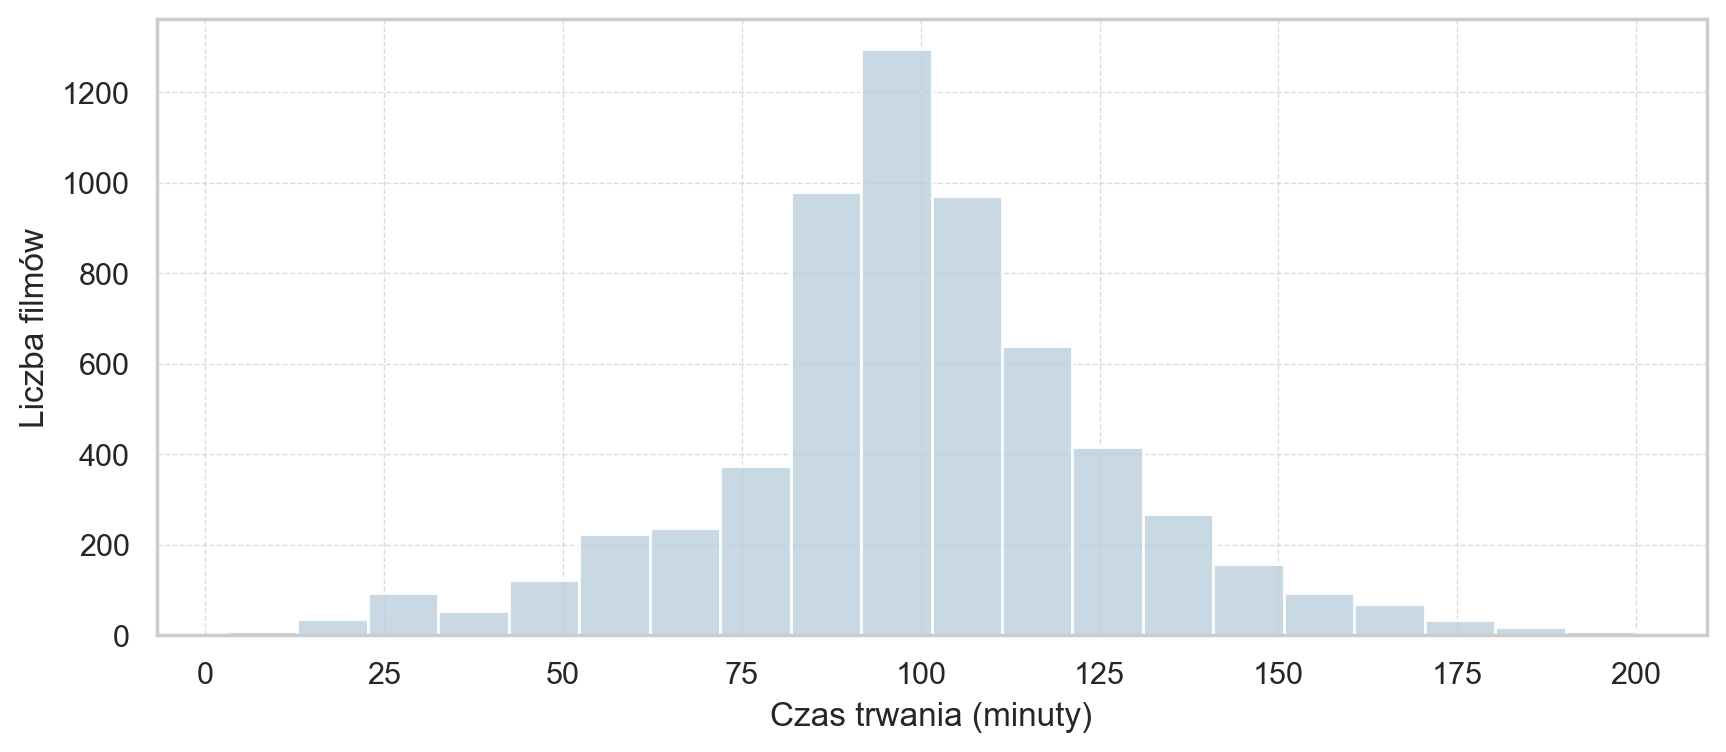

In [129]:
sns.set(style='whitegrid') 
plt.figure(figsize=(10,4), dpi=200)


sns.histplot(x='Minuts', data=df_movie[df_movie['Minuts'] <= 200 ], bins=20,
            color='#B8CDDC')

plt.xlabel("Czas trwania (minuty)", fontsize=12)
plt.ylabel("Liczba filmów", fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

Text(0.5, 0, 'Czas trwania (minuty)')

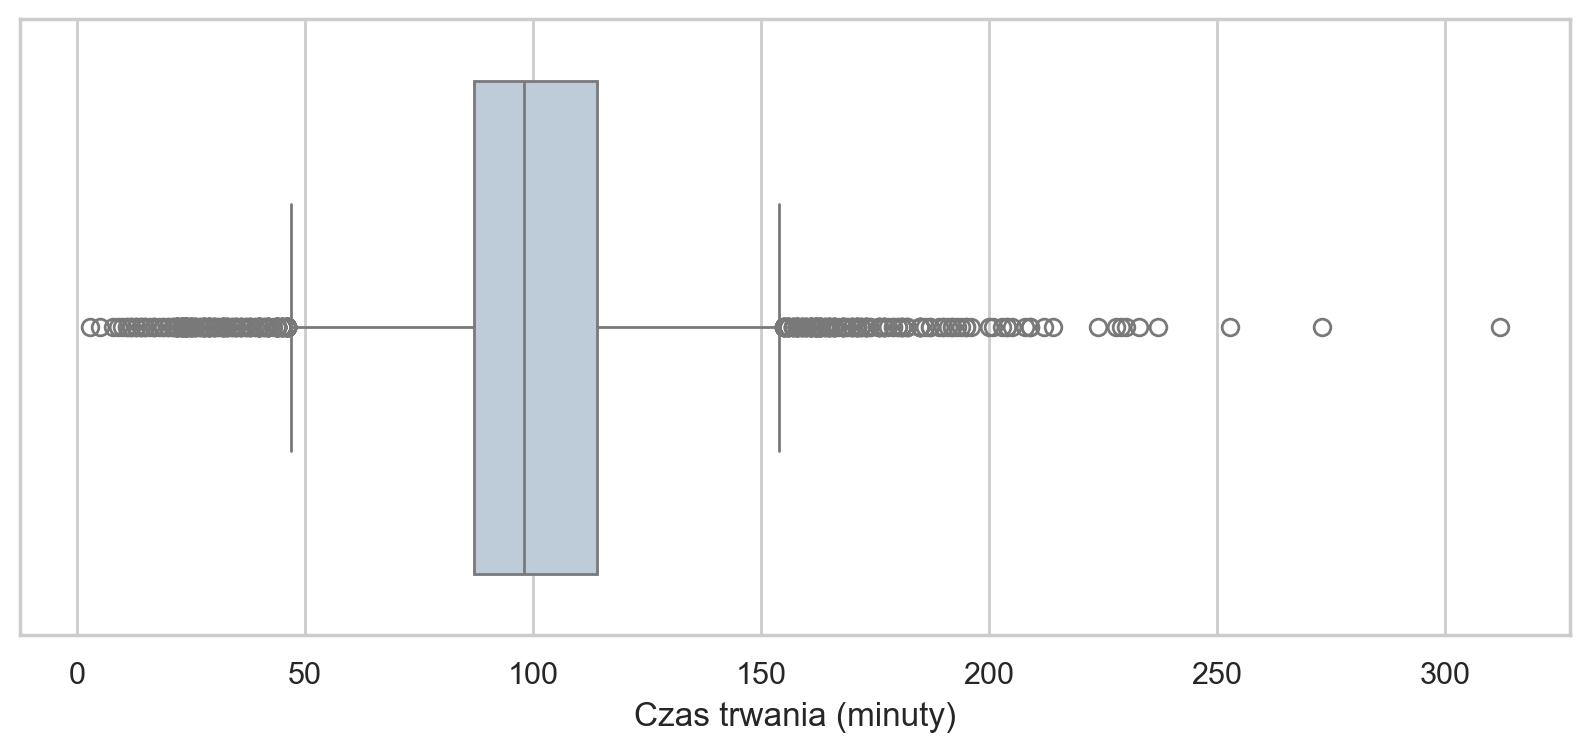

In [128]:
plt.figure(figsize=(10,4), dpi=200)
sns.boxplot(x=df_movie['Minuts'], color='#B8CDDC')

plt.xlabel("Czas trwania (minuty)", fontsize=12)